In [23]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import uproot
import os
import glob
import awkward as ak
from scipy.stats import norm
import matplotlib as mpl


In [35]:
data_path = "/home/haue/repositories/Masters/data/bananas/Al/"
g_singlep_path = "/home/haue/repositories/Masters/data/gamma/Al/withbeta"
data_path2 = "/home/haue/repositories/Masters/data/bananas/Si/"

#outputdir = "/figure_output/"
## Load in all files from the datapath with the suffix mlio.root
Al_files = glob.glob(os.path.join(data_path, "*mlio.root"))
g_singlep_files = glob.glob(os.path.join(g_singlep_path, "*mlio.root"))
Si_files = glob.glob(os.path.join(data_path2, "*mlio.root"))

#Files to be analyzed 
Analysis_files = Al_files

upscale = 1/0.34
scale =  4.993289447838043 # ratio between total solid angle coverage and solid angle coverage of id3 to account for lack of detection of beta particles

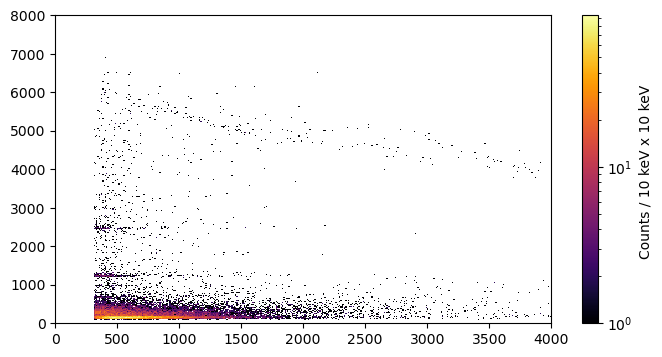

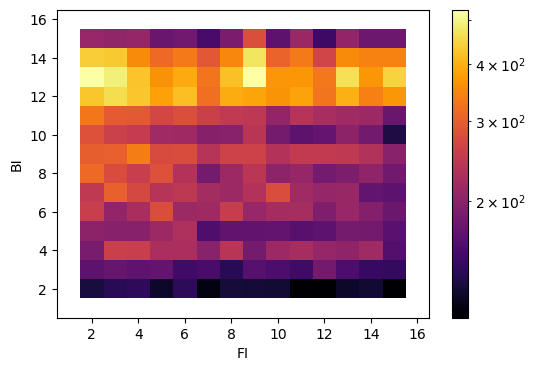

47876
150


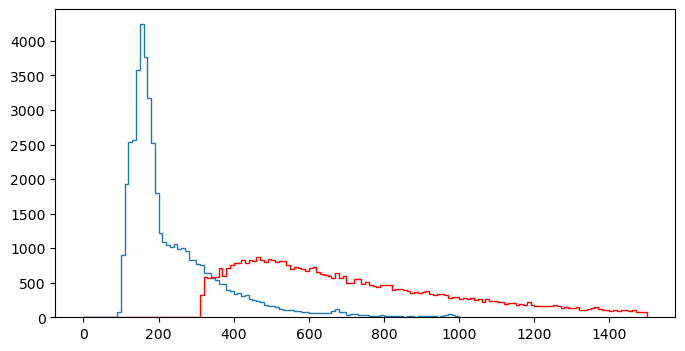

In [25]:
fEdep = np.array([])
bEdep = np.array([])
fi = np.array([])
bi = np.array([])    
for batch in uproot.iterate(Analysis_files, expressions=["fEdep", "bEdep", "FI", "BI"],
            cut=f"(id==3)"):
    fEdep = np.append(fEdep, ak.flatten(batch.fEdep))
    bEdep = np.append(bEdep, ak.flatten(batch.bEdep))
    fi = np.append(fi, ak.flatten(batch.FI))
    bi = np.append(bi, ak.flatten(batch.BI))

plt.figure(figsize=(8,4))
plt.hist2d(np.array(bEdep),np.array(fEdep), bins=(np.arange(0,4000+10,10),np.arange(0,8000+10,10)),
cmap=plt.cm.inferno, norm=mpl.colors.LogNorm(), rasterized=True)
cbar = plt.colorbar()
cbar.ax.set_ylabel(f"Counts / 10 keV x 10 keV ")
plt.show()

mask = (fEdep<1000) & (bEdep<1500)
fes = fEdep[mask]
bes = bEdep[mask]
fis = fi[mask]
bis = bi[mask]
plt.figure(figsize=(6,4))
plt.hist2d(np.array(fis),np.array(bis), bins=(np.arange(0.5,16.5+1,1),np.arange(0.5,16.5+1,1)),
cmap=plt.cm.inferno, norm=mpl.colors.LogNorm(), rasterized=True)
cbar = plt.colorbar()
plt.xlabel("FI")
plt.ylabel("BI")
plt.show()
print(len(fis))

plt.figure(figsize=(8,4))
plt.hist(fes, bins=np.arange(0,1000+10,10), histtype='step')
plt.hist(bes, bins=np.arange(0,1500+10,10), histtype='step', color='r')
ys, xs = np.histogram(fes,bins=np.arange(0,1000+10,10))
ymax = np.argmax(ys)
print(xs[ymax])
plt.yscale('linear')
plt.show()

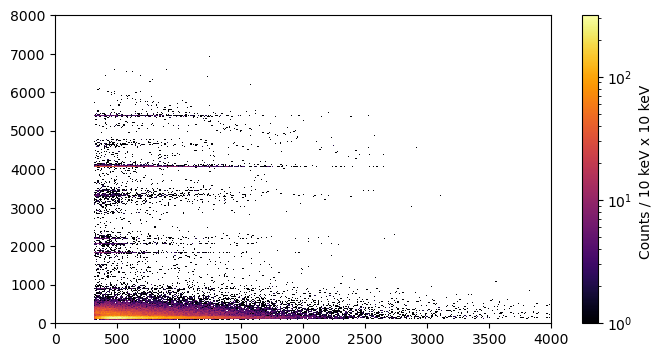

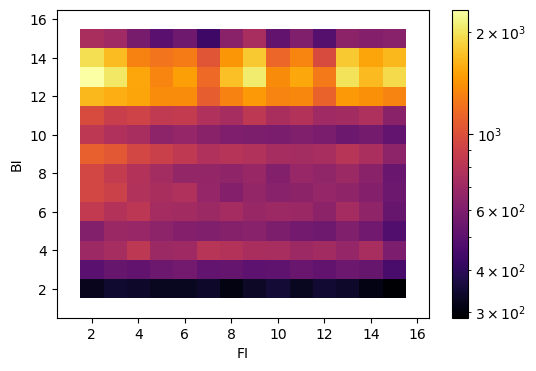

162724
150


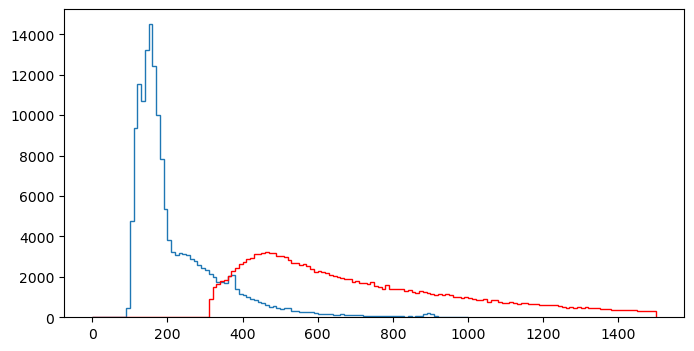

In [36]:
fEdep = np.array([])
bEdep = np.array([])
fi = np.array([])
bi = np.array([])    
for batch in uproot.iterate(Si_files, expressions=["fEdep", "bEdep", "FI", "BI"],
            cut=f"(id==3)"):
    fEdep = np.append(fEdep, ak.flatten(batch.fEdep))
    bEdep = np.append(bEdep, ak.flatten(batch.bEdep))
    fi = np.append(fi, ak.flatten(batch.FI))
    bi = np.append(bi, ak.flatten(batch.BI))

plt.figure(figsize=(8,4))
plt.hist2d(np.array(bEdep),np.array(fEdep), bins=(np.arange(0,4000+10,10),np.arange(0,8000+10,10)),
cmap=plt.cm.inferno, norm=mpl.colors.LogNorm(), rasterized=True)
cbar = plt.colorbar()
cbar.ax.set_ylabel(f"Counts / 10 keV x 10 keV ")
plt.show()

mask = (fEdep<1000) & (bEdep<1500)
fes = fEdep[mask]
bes = bEdep[mask]
fis = fi[mask]
bis = bi[mask]
plt.figure(figsize=(6,4))
plt.hist2d(np.array(fis),np.array(bis), bins=(np.arange(0.5,16.5+1,1),np.arange(0.5,16.5+1,1)),
cmap=plt.cm.inferno, norm=mpl.colors.LogNorm(), rasterized=True)
cbar = plt.colorbar()
plt.xlabel("FI")
plt.ylabel("BI")
plt.show()
print(len(fis))

plt.figure(figsize=(8,4))
plt.hist(fes, bins=np.arange(0,1000+10,10), histtype='step')
plt.hist(bes, bins=np.arange(0,1500+10,10), histtype='step', color='r')
ys, xs = np.histogram(fes,bins=np.arange(0,1000+10,10))
ymax = np.argmax(ys)
print(xs[ymax])
plt.yscale('linear')
plt.show()

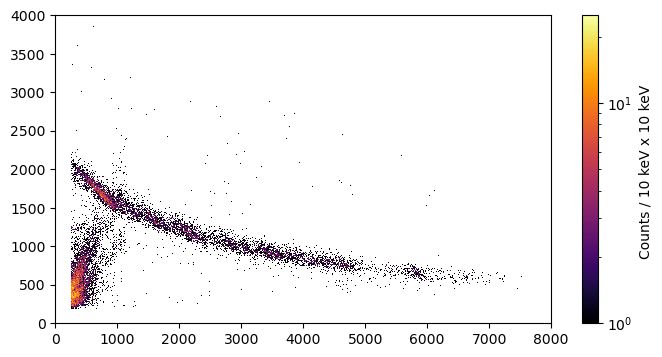

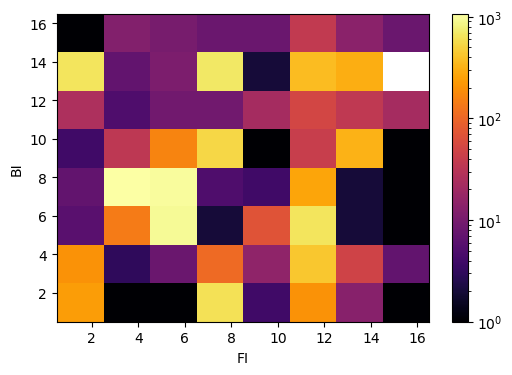

9469
340


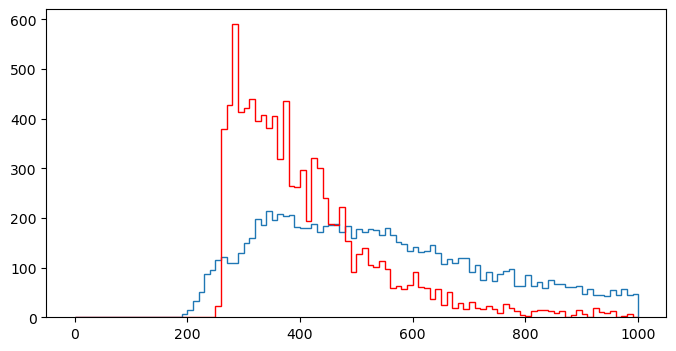

In [26]:

fEdep = np.array([])
bEdep = np.array([])
fi = np.array([])
bi = np.array([])    
for batch in uproot.iterate(Analysis_files, expressions=["fEdep", "bEdep", "FI", "BI"],
            cut=f"(id==0)"):
    fEdep = np.append(fEdep, ak.flatten(batch.fEdep))
    bEdep = np.append(bEdep, ak.flatten(batch.bEdep))
    fi = np.append(fi, ak.flatten(batch.FI))
    bi = np.append(bi, ak.flatten(batch.BI))
    
plt.figure(figsize=(8,4))
plt.hist2d(np.array(bEdep),np.array(fEdep), bins=(np.arange(0,8000+10,10),np.arange(0,4000+10,10)),
cmap=plt.cm.inferno, norm=mpl.colors.LogNorm(), rasterized=True)
cbar = plt.colorbar()
cbar.ax.set_ylabel(f"Counts / 10 keV x 10 keV ")
plt.show()

mask = (fEdep<1000) & (bEdep<1000)
fes = fEdep[mask]
bes = bEdep[mask]
fis = fi[mask]
bis = bi[mask]
plt.figure(figsize=(6,4))
plt.hist2d(np.array(fis),np.array(bis), bins=(np.arange(0.5,16.5+1,2),np.arange(0.5,16.5+1,2)),
cmap=plt.cm.inferno, norm=mpl.colors.LogNorm(), rasterized=True)
cbar = plt.colorbar()
plt.xlabel("FI")
plt.ylabel("BI")
plt.show()
print(len(fis))

plt.figure(figsize=(8,4))
plt.hist(fes, bins=np.arange(0,1000+10,10), histtype='step')
plt.hist(bes, bins=np.arange(0,1000+10,10), histtype='step', color='r')
ys, xs = np.histogram(fes,bins=np.arange(0,1000+10,10))
ymax = np.argmax(ys)
print(xs[ymax])
plt.yscale('linear')
plt.show()

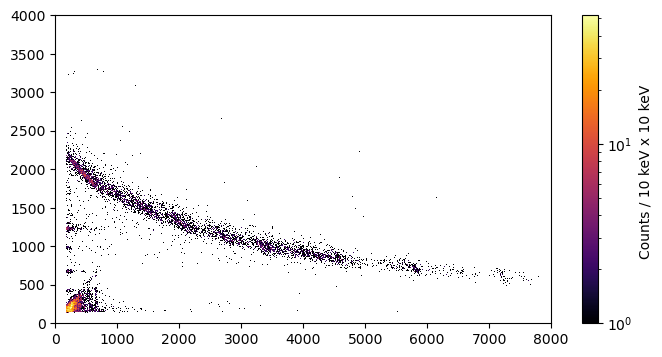

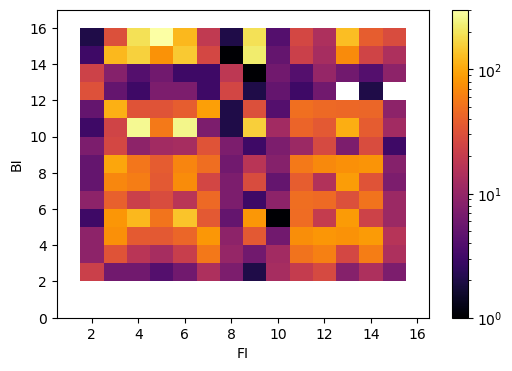

7328
200


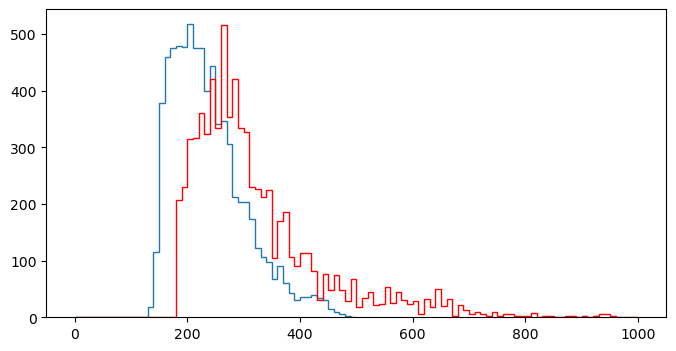

In [27]:

fEdep = np.array([])
bEdep = np.array([])
fi = np.array([])
bi = np.array([])    
for batch in uproot.iterate(Analysis_files, expressions=["fEdep", "bEdep", "FI", "BI"],
            cut=f"(id==2)"):
    fEdep = np.append(fEdep, ak.flatten(batch.fEdep))
    bEdep = np.append(bEdep, ak.flatten(batch.bEdep))
    fi = np.append(fi, ak.flatten(batch.FI))
    bi = np.append(bi, ak.flatten(batch.BI))
    
plt.figure(figsize=(8,4))
plt.hist2d(np.array(bEdep),np.array(fEdep), bins=(np.arange(0,8000+10,10),np.arange(0,4000+10,10)),
cmap=plt.cm.inferno, norm=mpl.colors.LogNorm(), rasterized=True)
cbar = plt.colorbar()
cbar.ax.set_ylabel(f"Counts / 10 keV x 10 keV ")
plt.show()

mask = (fEdep<500) & (bEdep<1000)
fes = fEdep[mask]
bes = bEdep[mask]
fis = fi[mask]
bis = bi[mask]
plt.figure(figsize=(6,4))
plt.hist2d(np.array(fis),np.array(bis), bins=(np.arange(0.5,16.5+1,1),np.arange(0,16.5+1,1)),
cmap=plt.cm.inferno, norm=mpl.colors.LogNorm(), rasterized=True)
cbar = plt.colorbar()
plt.xlabel("FI")
plt.ylabel("BI")
plt.show()
print(len(fis))

plt.figure(figsize=(8,4))
plt.hist(fes, bins=np.arange(0,500+10,10), histtype='step')
plt.hist(bes, bins=np.arange(0,1000+10,10), histtype='step', color='r')
ys, xs = np.histogram(fes,bins=np.arange(0,1000+10,10))
ymax = np.argmax(ys)
print(xs[ymax])
plt.yscale('linear')
plt.show()

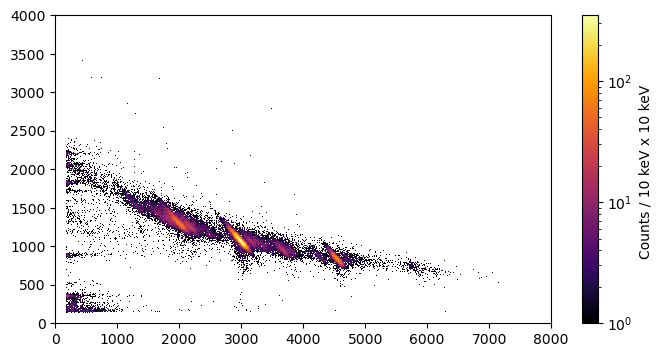

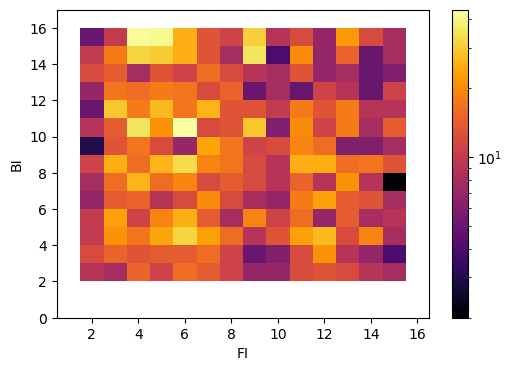

2817
350


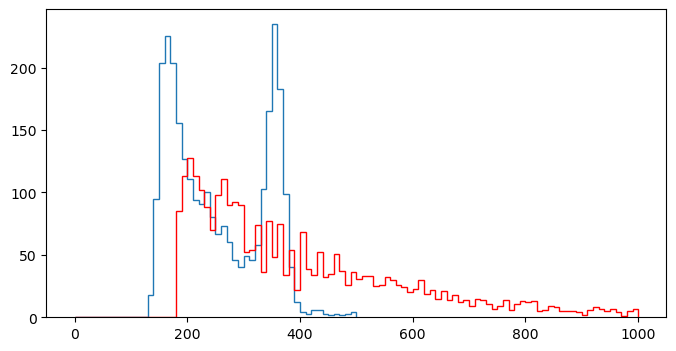

In [37]:

fEdep = np.array([])
bEdep = np.array([])
fi = np.array([])
bi = np.array([])    
for batch in uproot.iterate(Si_files, expressions=["fEdep", "bEdep", "FI", "BI"],
            cut=f"(id==2)"):
    fEdep = np.append(fEdep, ak.flatten(batch.fEdep))
    bEdep = np.append(bEdep, ak.flatten(batch.bEdep))
    fi = np.append(fi, ak.flatten(batch.FI))
    bi = np.append(bi, ak.flatten(batch.BI))
    
plt.figure(figsize=(8,4))
plt.hist2d(np.array(bEdep),np.array(fEdep), bins=(np.arange(0,8000+10,10),np.arange(0,4000+10,10)),
cmap=plt.cm.inferno, norm=mpl.colors.LogNorm(), rasterized=True)
cbar = plt.colorbar()
cbar.ax.set_ylabel(f"Counts / 10 keV x 10 keV ")
plt.show()

mask = (fEdep<500) & (bEdep<1000)
fes = fEdep[mask]
bes = bEdep[mask]
fis = fi[mask]
bis = bi[mask]
plt.figure(figsize=(6,4))
plt.hist2d(np.array(fis),np.array(bis), bins=(np.arange(0.5,16.5+1,1),np.arange(0,16.5+1,1)),
cmap=plt.cm.inferno, norm=mpl.colors.LogNorm(), rasterized=True)
cbar = plt.colorbar()
plt.xlabel("FI")
plt.ylabel("BI")
plt.show()
print(len(fis))

plt.figure(figsize=(8,4))
plt.hist(fes, bins=np.arange(0,500+10,10), histtype='step')
plt.hist(bes, bins=np.arange(0,1000+10,10), histtype='step', color='r')
ys, xs = np.histogram(fes,bins=np.arange(0,1000+10,10))
ymax = np.argmax(ys)
print(xs[ymax])
plt.yscale('linear')
plt.show()

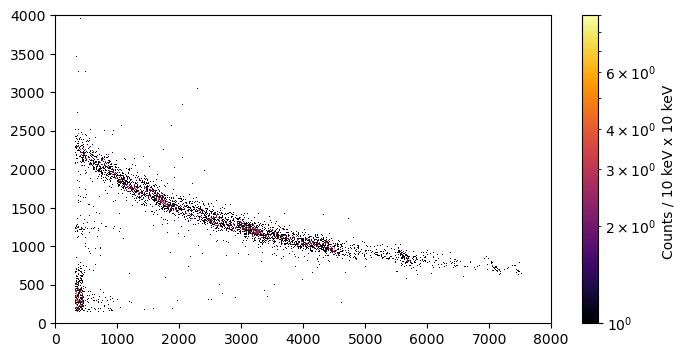

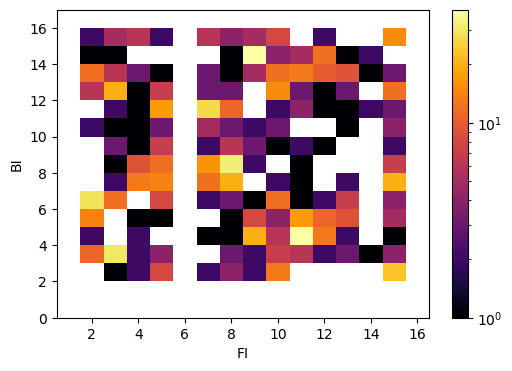

931
280


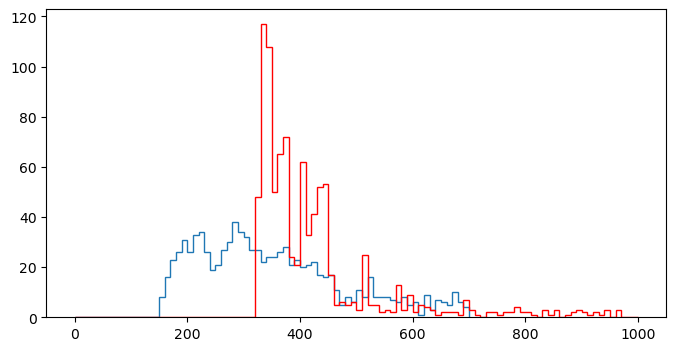

In [28]:

fEdep = np.array([])
bEdep = np.array([])
fi = np.array([])
bi = np.array([])    
for batch in uproot.iterate(Analysis_files, expressions=["fEdep", "bEdep", "FI", "BI"],
            cut=f"(id==1)"):
    fEdep = np.append(fEdep, ak.flatten(batch.fEdep))
    bEdep = np.append(bEdep, ak.flatten(batch.bEdep))
    fi = np.append(fi, ak.flatten(batch.FI))
    bi = np.append(bi, ak.flatten(batch.BI))


plt.figure(figsize=(8,4))
plt.hist2d(np.array(bEdep),np.array(fEdep), bins=(np.arange(0,8000+10,10),np.arange(0,4000+10,10)),
cmap=plt.cm.inferno, norm=mpl.colors.LogNorm(), rasterized=True)
cbar = plt.colorbar()
cbar.ax.set_ylabel(f"Counts / 10 keV x 10 keV ")
plt.show()


mask = (fEdep<700) & (bEdep<1000)
fes = fEdep[mask]
bes = bEdep[mask]
fis = fi[mask]
bis = bi[mask]
plt.figure(figsize=(6,4))
plt.hist2d(np.array(fis),np.array(bis), bins=(np.arange(0.5,16.5+1,1),np.arange(0,16.5+1,1)),
cmap=plt.cm.inferno, norm=mpl.colors.LogNorm(), rasterized=True)
cbar = plt.colorbar()
plt.xlabel("FI")
plt.ylabel("BI")
plt.show()
print(len(fis))

plt.figure(figsize=(8,4))
plt.hist(fes, bins=np.arange(0,700+10,10), histtype='step')
plt.hist(bes, bins=np.arange(0,1000+10,10), histtype='step', color='r')
ys, xs = np.histogram(fes,bins=np.arange(0,1000+10,10))
ymax = np.argmax(ys)
print(xs[ymax])
plt.yscale('linear')
plt.show()

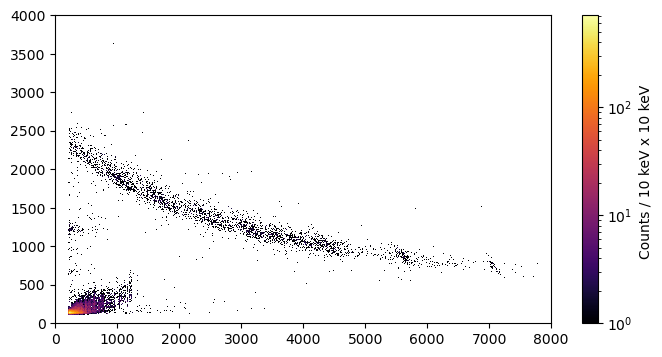

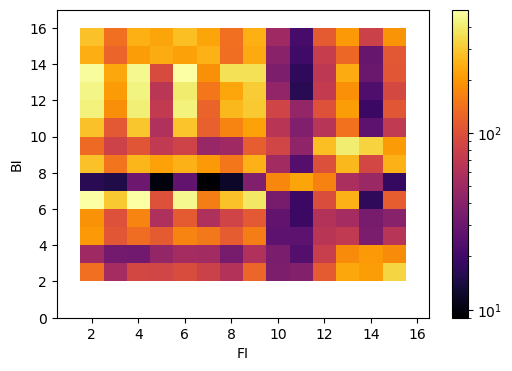

28815


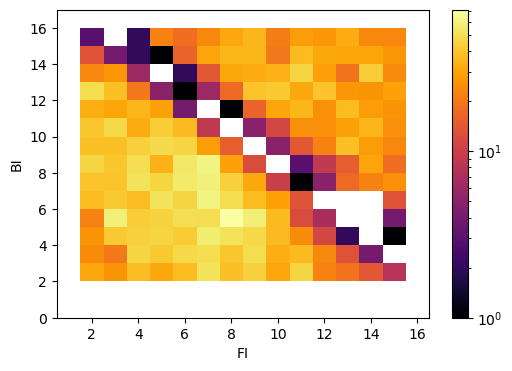

130


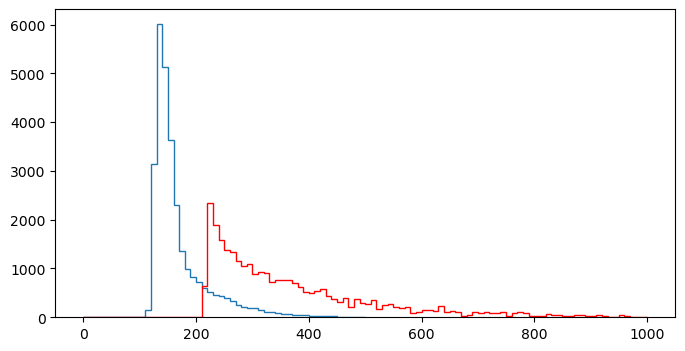

In [29]:

fEdep = np.array([])
bEdep = np.array([])
fi = np.array([])
bi = np.array([])    
for batch in uproot.iterate(Analysis_files, expressions=["fEdep", "bEdep", "FI", "BI"],
            cut=f"(id==5)"):
    fEdep = np.append(fEdep, ak.flatten(batch.fEdep))
    bEdep = np.append(bEdep, ak.flatten(batch.bEdep))
    fi = np.append(fi, ak.flatten(batch.FI))
    bi = np.append(bi, ak.flatten(batch.BI))
    
plt.figure(figsize=(8,4))
plt.hist2d(np.array(bEdep),np.array(fEdep), bins=(np.arange(0,8000+10,10),np.arange(0,4000+10,10)),
cmap=plt.cm.inferno, norm=mpl.colors.LogNorm(), rasterized=True)
cbar = plt.colorbar()
cbar.ax.set_ylabel(f"Counts / 10 keV x 10 keV ")
plt.show()

mask = (fEdep<500) & (bEdep<1000)
fes = fEdep[mask]
bes = bEdep[mask]
fis = fi[mask]
bis = bi[mask]
plt.figure(figsize=(6,4))
plt.hist2d(np.array(fis),np.array(bis), bins=(np.arange(0.5,16.5+1,1),np.arange(0,16.5+1,1)),
cmap=plt.cm.inferno, norm=mpl.colors.LogNorm(), rasterized=True)
cbar = plt.colorbar()
plt.xlabel("FI")
plt.ylabel("BI")
plt.show()
print(len(fis))

mask = (fEdep>500) & (bEdep>1000)
fis = fi[mask]
bis = bi[mask]
plt.figure(figsize=(6,4))
plt.hist2d(np.array(fis),np.array(bis), bins=(np.arange(0.5,16.5+1,1),np.arange(0,16.5+1,1)),
cmap=plt.cm.inferno, norm=mpl.colors.LogNorm(), rasterized=True)
cbar = plt.colorbar()
plt.xlabel("FI")
plt.ylabel("BI")
plt.show()



plt.figure(figsize=(8,4))
plt.hist(fes, bins=np.arange(0,500+10,10), histtype='step')
plt.hist(bes, bins=np.arange(0,1000+10,10), histtype='step', color='r')
ys, xs = np.histogram(fes,bins=np.arange(0,1000+10,10))
ymax = np.argmax(ys)
print(xs[ymax])
plt.yscale('linear')
plt.show()

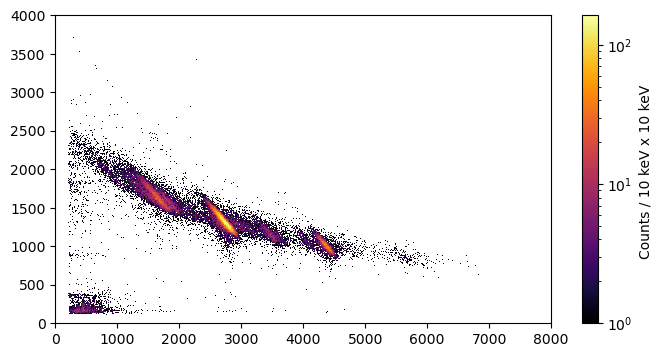

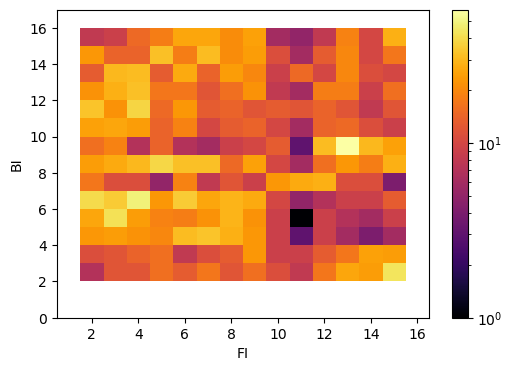

3425


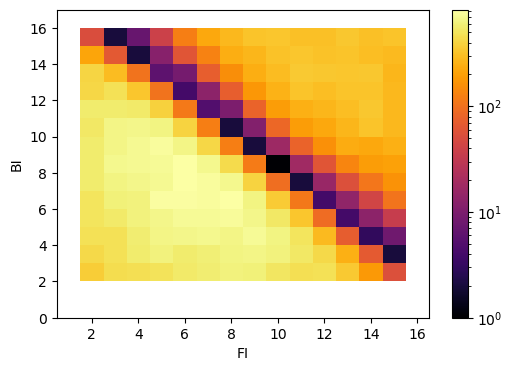

150


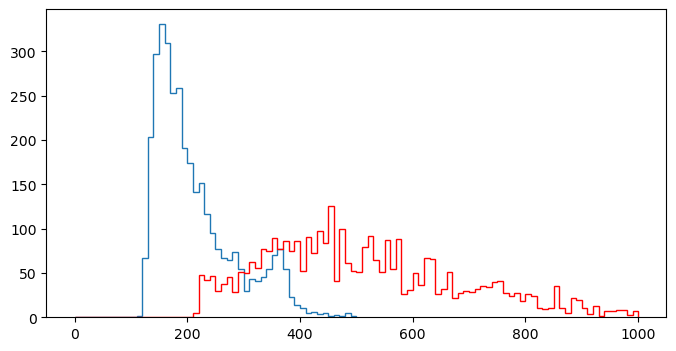

In [38]:

fEdep = np.array([])
bEdep = np.array([])
fi = np.array([])
bi = np.array([])    
for batch in uproot.iterate(Si_files, expressions=["fEdep", "bEdep", "FI", "BI"],
            cut=f"(id==5)"):
    fEdep = np.append(fEdep, ak.flatten(batch.fEdep))
    bEdep = np.append(bEdep, ak.flatten(batch.bEdep))
    fi = np.append(fi, ak.flatten(batch.FI))
    bi = np.append(bi, ak.flatten(batch.BI))
    
plt.figure(figsize=(8,4))
plt.hist2d(np.array(bEdep),np.array(fEdep), bins=(np.arange(0,8000+10,10),np.arange(0,4000+10,10)),
cmap=plt.cm.inferno, norm=mpl.colors.LogNorm(), rasterized=True)
cbar = plt.colorbar()
cbar.ax.set_ylabel(f"Counts / 10 keV x 10 keV ")
plt.show()

mask = (fEdep<500) & (bEdep<1000)
fes = fEdep[mask]
bes = bEdep[mask]
fis = fi[mask]
bis = bi[mask]
plt.figure(figsize=(6,4))
plt.hist2d(np.array(fis),np.array(bis), bins=(np.arange(0.5,16.5+1,1),np.arange(0,16.5+1,1)),
cmap=plt.cm.inferno, norm=mpl.colors.LogNorm(), rasterized=True)
cbar = plt.colorbar()
plt.xlabel("FI")
plt.ylabel("BI")
plt.show()
print(len(fis))

mask = (fEdep>500) & (bEdep>1000)
fis = fi[mask]
bis = bi[mask]
plt.figure(figsize=(6,4))
plt.hist2d(np.array(fis),np.array(bis), bins=(np.arange(0.5,16.5+1,1),np.arange(0,16.5+1,1)),
cmap=plt.cm.inferno, norm=mpl.colors.LogNorm(), rasterized=True)
cbar = plt.colorbar()
plt.xlabel("FI")
plt.ylabel("BI")
plt.show()



plt.figure(figsize=(8,4))
plt.hist(fes, bins=np.arange(0,500+10,10), histtype='step')
plt.hist(bes, bins=np.arange(0,1000+10,10), histtype='step', color='r')
ys, xs = np.histogram(fes,bins=np.arange(0,1000+10,10))
ymax = np.argmax(ys)
print(xs[ymax])
plt.yscale('linear')
plt.show()

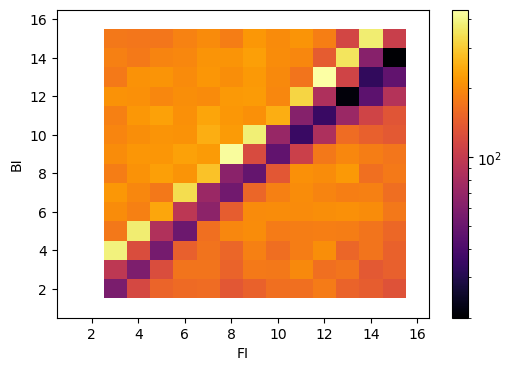

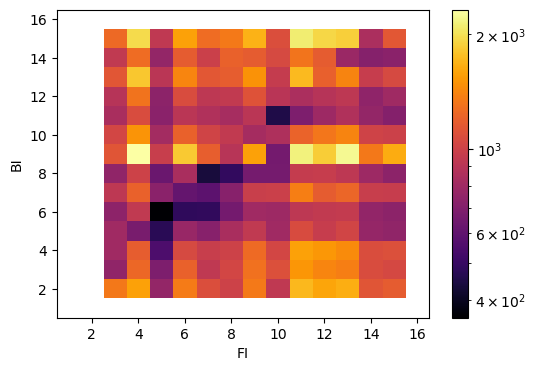

170


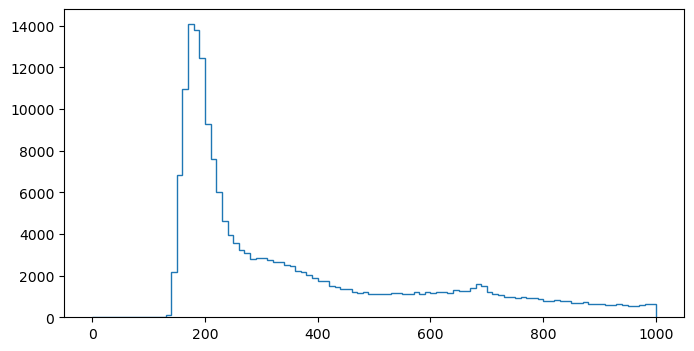

In [34]:

fEdep = np.array([])
bEdep = np.array([])
fi = np.array([])
bi = np.array([])    
for batch in uproot.iterate(Analysis_files, expressions=["E", "bEdep", "FI", "BI"],
            cut=f"(id==4)"):
    fEdep = np.append(fEdep, ak.flatten(batch.E))
    bEdep = np.append(bEdep, ak.flatten(batch.bEdep))
    fi = np.append(fi, ak.flatten(batch.FI))
    bi = np.append(bi, ak.flatten(batch.BI))

mask = (fEdep>1000)
fis = fi[mask]
bis = bi[mask]
plt.figure(figsize=(6,4))
plt.hist2d(np.array(fis),np.array(bis), bins=(np.arange(0.5,16+1.5,1),np.arange(0.5,16+1.5,1)),
cmap=plt.cm.inferno, norm=mpl.colors.LogNorm(), rasterized=True)
cbar = plt.colorbar()
plt.xlabel("FI")
plt.ylabel("BI")
plt.show()
mask = (fEdep<1000)
fes = fEdep[mask]

fis = fi[mask]
bis = bi[mask]
plt.figure(figsize=(6,4))
plt.hist2d(np.array(fis),np.array(bis), bins=(np.arange(0.5,16+1.5,1),np.arange(0.5,16+1.5,1)),
cmap=plt.cm.inferno, norm=mpl.colors.LogNorm(), rasterized=True)
cbar = plt.colorbar()
plt.xlabel("FI")
plt.ylabel("BI")
plt.show()

plt.figure(figsize=(8,4))
plt.hist(fes, bins=np.arange(0,1000+10,10), histtype='step')
ys, xs = np.histogram(fes,bins=np.arange(0,1000+10,10))
ymax = np.argmax(ys)
print(xs[ymax])
plt.yscale('linear')
plt.show()


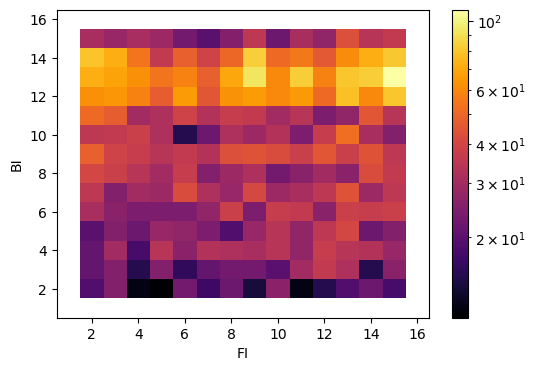

7322


In [31]:
fEdep = np.array([])
bEdep = np.array([])
fi = np.array([])
bi = np.array([])    
for batch in uproot.iterate(g_singlep_files, expressions=["fEdep", "bEdep", "FI", "BI"],
            cut=f"(bg1) | (bg2)"):
    fEdep = np.append(fEdep, ak.flatten(batch.fEdep))
    bEdep = np.append(bEdep, ak.flatten(batch.bEdep))
    fi = np.append(fi, ak.flatten(batch.FI))
    bi = np.append(bi, ak.flatten(batch.BI))
    
mask = (fEdep<1000) & (bEdep<1500)
fis = fi[mask]
bis = bi[mask]
plt.figure(figsize=(6,4))
plt.hist2d(np.array(fis),np.array(bis), bins=(np.arange(0.5,16+1.5,1),np.arange(0.5,16+1.5,1)),
cmap=plt.cm.inferno, norm=mpl.colors.LogNorm(), rasterized=True)
cbar = plt.colorbar()
plt.xlabel("FI")
plt.ylabel("BI")
plt.show()
print(len(fis))